# Result Analysis

####  测试日期

2018-05-24

#### 相关模型：

+  DSSM
+  TFIDF
+  TOPIC

#### 原始匹配语料库： 

全量问题 + 全部同义句

#### 测试数据

@晓梅 给到samples.xls的数据中的100个银行相关问题 + 1条非银行相关问题， 这条问题主要是为了检测非银行问题搜索的性能。 

## 整体正确率

In [1]:
import  matplotlib.pyplot as plt

In [2]:
import time

In [3]:
import pandas as pd
%matplotlib inline

values = ['wrong', 'right', 'unsure']

def give_result_global_info(dataframe):
    dataframe.right.value_counts().plot(kind='pie')
    ratios = []
    for v in values:
        r = len(dataframe[dataframe.right == v]) / len(dataframe) 
        print('{}: {}%'.format(v, r * 100))
        ratios.append(v)
    assert len(ratios) == 3
    return ratios

In [5]:
result = pd.read_csv('data/result_100.csv-2018-05-23-03-tst-all-question.csv')

wrong: 68.97689768976898%
right: 28.38283828382838%
unsure: 2.6402640264026402%


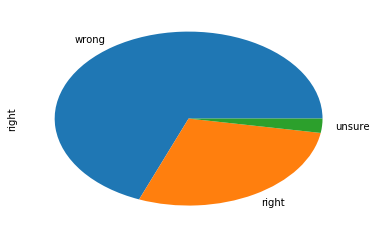

In [6]:
ratios = give_result_global_info(result)

## Wrong Ratio, Right Ratio, Unsure Ratio

#### 其中， 102个问题， 3个模型， 结果总体为 68.98% 错误, 23.38% 正确， 2.6% 未知

## 分模型分析

In [7]:
dssm_result = result[result.model == 'dssm']

wrong: 98.01980198019803%
right: 1.9801980198019802%
unsure: 0.0%


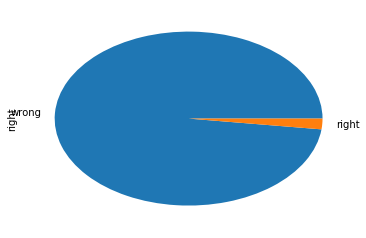

In [8]:
ratios_d = give_result_global_info(dssm_result)

wrong: 76.23762376237624%
right: 19.801980198019802%
unsure: 3.9603960396039604%


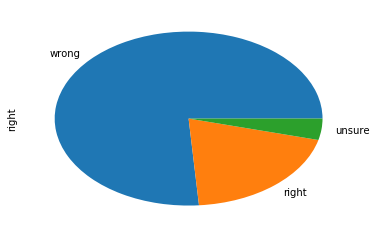

In [9]:
tfidf = result[result.model == 'tfidf']
ratios_t = give_result_global_info(tfidf)

wrong: 32.67326732673268%
right: 63.366336633663366%
unsure: 3.9603960396039604%


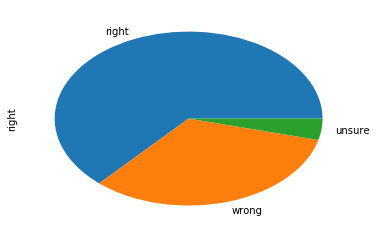

In [10]:
topic = result[result.model == 'topic']
ratios_tp = give_result_global_info(topic)

### 错误、正确结果分模型分析

In [13]:
dssm_result[dssm_result['right'] == 'right']

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
22,大额存单的最低起购金额,dssm,什么是“悦生活”,“悦生活”的网址,什么是保险类别？,保险类别,如何注销龙商户,如何注销电话银行,注销电话银行,手机银行怎样注销,...,注销手机银行,实物金价格表,实物金价目表,快捷支付注销,后退,手机银行咋个注销,如何注销龙支付,保险类别有哪些,保险类别是什么,right
40,财富贷有什么用,dssm,“悦生活”的网址,什么是“悦生活”,准贷记卡有哪几种,下载安装手机银行手机银行,感激涕零,手机银行一半怎样下载安装,什么是财富卡,什么是套算汇率,...,怎么下载安装手机银行,保险类别有哪些,保险类别是什么,保险类别,什么是保险类别？,实物金价格表,实物金价目表,财富贷,财富之星是什么,right


In [14]:
tfidf[tfidf['right'] == 'right'].sample(10)

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
227,个人网银在线申请信用卡功能说明,tfidf,个人网银申请信用卡分期,个人网银申请信用卡损坏换卡,个人网银维护信用卡约定还款账户,个人网银为信用卡还款,个人网银进行信用卡免验密设置,个人网银进行信用卡开卡,个人网银申请快贷业务,个人网银进行信用卡开卡几次机会,...,开通信用卡主卡个人网银,个人网银申请信用卡,个人网银查询信用卡申请进度,个人网银归还信用卡外币欠款,个人网银申请龙卡E付卡,个人网银咋个申请退保,个人网银申请退保,个人网银修改信用卡账单地址,个人网银咋样申请退保,right
245,什么是信用卡自动还款,tfidf,美元还款信用卡,龙卡人民币信用卡澳大利亚地区客服电话,信用卡免息期计算,信用卡特殊之处,信用卡销户是否退还溢缴款,信用卡网上交易时应注意些,信用卡消费时间入账,信用卡到期更换后密码会变动,...,信用卡何时会收到退款,ATMCRS还信用卡入账多久,ATMCRS还信用卡多久入账,注册为信用卡网站实名客户享受便利,电话银行信用卡还款,ATMCRS还信用卡实时入账,ATMCRS信用卡还款入账时间,信用卡激活是否允许代办,信用卡具备优点,right
146,可以办理活期转定期吗,tfidf,办理全国话费充值是否时间限制,现金分期办理要求含义,结算通卡状态正常时办理销户,乐当家理财卡办理配套存单,办理公益捐款,办理账户商品交易签约,蓝豹百大龙卡联名卡办理数量规则,蓝豹百大龙卡联名卡办理数量上限,...,定活两便转定期存款办理,办理基金交易,办理E商贸通出入金,办理陆港通龙卡资料,办理聚财,聚财咋个办理,办理账户贵金属交易,办理零存整取提前支取,办理个人账户贵金属风险,right
98,个人网银可以申请借记卡吗,tfidf,个人网银申请退保,个人网银咋个申请退保,无法登录个人网银因素,个人网银账户贵金属支持币种交易,个人网银便捷支付客户交易时验证信息,修改个人网银签约手机号码,个人商城申请延期付款规则,个人网银登录密码锁定或遗忘处理,...,个人网银登录密码锁定,个人网银咋样申请退保,个人网银申请龙卡E付卡,个人网银申请快贷业务,通过个人网银申请信贷,个人网银申请信用卡损坏换卡,个人网银申请信用卡,个人网银申请储蓄卡,个人网银申请信用卡分期,right
188,注销PAD银行的途径有哪些,tfidf,改接收银行短信手机号码,贵州客户接收外汇汇入汇款向汇款银行提供信息,注销PAD银行,PAD银行保证安全,广东客户接收外汇汇入汇款向汇款银行提供信息,PAD银行安全性问题,补缴短信银行服务费,短信银行释义,...,PAD银行查看定期存款,青海客户接收外汇汇入汇款向汇款银行提供信息,PAD银行看不到定期存款,短信银行欠费宽限期内是否会自动补扣,鑫存管证券转银行银转证,银行本票提示付款时间,银行外汇牌价,PAD银行特点,银行余额,right
194,能否使用网银查询贷款信息,tfidf,安全地使用建行网银,网银查询贷款信息,网银查询修改撤消黄金定投计划,网银查询账户变动短信通知签约状态,查询网银证书是否过期,网银查询养老保险金账户信息,网银基金客户历史交易明细查询,网银证书使用期限限制,...,网银提前还款进度查询,查询网银交易明细操作步骤,查询网银交易明细,网银查询黄金买卖编号,网银黄金定投历史交易明细查询,查询修改网银签约手机号码,使用网银短信动态口令,网银查询账号,咋个查询网银交易明细,right
215,在线网银缴保费功能说明,tfidf,系统无法登录网银说明,网银登录预留信息设置功能说明,支付宝还款功能说明,ATMCRS修改手机号码功能说明,快捷支付功能说明,网银支付功能说明,电话银行大额现金提现预约功能说明,网银安全检测工具功能,...,网银认购理财功能说明,网银认购国债功能说明,网银转账退款问题说明,网银定投黄金操作说明,蓝豹百大龙卡联名卡功能说明,保险缴费功能说明,龙卡通睡眠户激活功能说明,变动鑫存管签约账户功能说明,陆港通龙卡功能说明,right
110,手机银行能否申请借记卡,tfidf,手机银行申请,申请手机银行,手机银行能不能申请贷款,手机银行申请信用卡分期,手机银行申请贷款方法,手机银行申请贷款流程,在手机银行申请贷款,手机银行主要用来干嘛,...,手机银行撤消基金定投协议,手机银行申请贷款,手机银行申请退保,手机银行申请贷款操作步骤,手机银行申请快贷业务,通过手机银行申请贷款,手机银行申请信用卡,手机银行申请办法,手机银行申请储蓄卡,right
29,PAD银行账户查询功能说明,tfidf,PAD银行信用卡还款查询功能说明,PAD银行账户查询功能,短信银行查询交易明细,发短信查询短信银行是否欠费,银行联行号查询,PAD银行账户查询内容,PAD银行悦生活缴费说明,微信银行查询周边网点功能说明,...,PAD银行查询账户类型,微信银行查询账户明细功能说明,查询短信银行功能,PAD银行中的悦生活说明,银行支票说明,查询银行联行号,短信银行免费试用期说明,查询外汇汇款银行SWIFTCODE,PAD银行注意说明,right
104,个人网银申请借记卡方法,tfidf,个人网银存入定期存款方法,登录个人网银方法,个人网银咋样申请退保,个人网银追加新账户方法,个人网银实时买入账户贵金属方法,个人网银申请龙卡E付卡,个人网银追加新账户方法,个人网银申请快贷业务,...,个人网银办理账户贵金属交易方法,删除个人网银账户方法,个人网银存入或支取通知存款方法,个人网银申请退保,注销个人网银方法,个人网银预约医院专家挂号方法,个人网银维护收款人名册方法,个人网银咋个申请退保,首次登录个人网银方法,right


In [15]:
topic[topic['right'] == 'right'].sample(10)

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
174,他人代办活期存款条件,topic,他人代办活期存款,他人代办活期存款账户销户,他人代办换折,代办存折的要求,代办自动转存提前支取的条件,存折销户支持代办吗,借记卡代办条件,外币能否办理定期与活期的互转,...,定活两便转活期,代办存折的条件,定期自动转存后提前支取可否由他人代办,定期转存后能否找人代办提前支取,整存整取代办,定期自动转存后能否申请代办支取,存折销户如何让人代办,存折销户可以别人代办吗,如何代办存折销户,right
159,客户办理活期存款需要什么资料,topic,客户办理活期存款,定活两便可以在哪些渠道办理转活期存款,办理活期存款证明,怎样在线办理活期转定期,请问我可以在异地办理外币存取款或转账吗？哪些币种能办理,以前不是建行的客户，第一次如何办理借记卡（本人）,如何办理活期存折的开户,定活两便转活期存款办理,...,办理零存整取存款证明需要什么资料,如何办理活期一本通账户结清,什么样的客户可以通过网上银行办理外汇买卖？,定活两便转活期存款怎么办理,怎么办理定活两便转活期存款？,在线办理活期转定期操作步骤,定活两便办理需要什么资料,定活两便转活期存款的办理方法,如何办理定期与活期互转,right
144,可以办理活期转定期吗,topic,活期转定期怎么办理,在哪里办理活期转定期,定活两便转定期存款怎么办理,定活两便转活期存款办理,ATM办理活期转定期,咋办理定活两便转活期,定活两便转定期存款办理,办理定期定期自动转,...,定活两便可以在哪些渠道办理转定期存款,办理活期转定期,怎样在线办理活期转定期,如何办理活期存款转为定期存款,如何办理定期与活期互转,在线办理活期转定期操作步骤,定活两便转活期存款怎么办理,怎么办理定活两便转活期存款？,怎么办理定活两便转定期存款？,right
183,怎样注销PAD银行,topic,注销PAD银行,怎样登录PAD银行,PAD银行对手机银行或者网银支持吗,PAD银行怎么下载安装,手机银行怎样注销,注销电话银行,手机银行如何注销,手机银行怎么注销,...,手机银行注销,为什么PAD银行不能登录,PAD 注销手机银行,PAD银行是否支持手机银行或者网银,PAD银行支持手机银行或者网银吗,登录PAD银行,PAD银行在哪里登录,如何注销电话银行,PAD银行是否同时支持手机银行或者网银,right
180,可以在线注销PAD银行吗,topic,注销PAD银行,短信银行可以在线注销吗,为什么PAD银行不能登录,PAD银行怎么下载安装,手机银行如何注销,手机银行怎么注销,如何注销手机银行,PAD银行可以还信用卡吗？,...,PAD银行在哪里登录,PAD 注销手机银行,PAD银行支持手机银行或者网银吗,PAD银行对手机银行或者网银支持吗,短信银行在哪里可以注销,PAD银行是否同时支持手机银行或者网银,PAD银行支持网银吗,PAD银行是否支持手机银行或者网银,PAD银行转账是免费的吗,right
201,网银查询贷款信息功能说明,topic,网银查询贷款信息,个人网银如何查询贷款信息,网银如何查询已结清贷款,个人网银如何查询E商贸通信息,公积金类账户网站查询服务可以查询哪些信息？,如何在网站查询储蓄账户信息，查询信息包括哪些,个人网银“支票查询”可查询到哪些信息,个人网银如何查询预约缴费信息,...,个人网银查询账户信息的方法,如何查询贷款的基本信息,贷款信息查询,如何查询个人贷款的基本信息,贷款账单信息查询,我可以通过网上银行修改我的贷款信息吗？,个人网银如何查询保单信息,如何通过网银查询账户信息,个人网银可查询多久的信用卡对账信息,right
72,“蓝豹百大”龙卡联名卡的分类,topic,蓝豹百大贵宾龙卡相关费用说明,非“蓝豹”LAMPO、常州百大公司会员客户如何办理“蓝豹·百大”龙卡联名卡,蓝豹百大贵宾卡有年费吗,蓝豹百大龙卡联名卡,蓝豹百大龙卡联名卡说明,查询蓝豹百大龙卡联名卡,“蓝豹·百大”龙卡联名卡有哪些功能,“蓝豹百大”龙卡联名卡能干什么,...,“蓝豹百大”龙卡联名卡的功能有哪些,“文峰龙卡”联名卡可享受哪些权益,“蓝豹百大”龙卡联名卡的有效期,“蓝豹·百大”龙卡联名卡的有效期,“蓝豹百大”龙卡联名卡的种类,蓝豹百大龙卡联名卡介绍,蓝豹百大龙卡联名卡是什么,什么是“蓝豹·百大”龙卡联名卡,“蓝豹百大”龙卡联名卡贵宾卡的管理费用,right
75,“蓝豹百大”龙卡联名卡分哪些,topic,蓝豹百大贵宾龙卡相关费用说明,非“蓝豹”LAMPO、常州百大公司会员客户如何办理“蓝豹·百大”龙卡联名卡,蓝豹百大龙卡联名卡贵宾卡相关手续费,“蓝豹百大”龙卡联名卡贵宾卡的管理费用,蓝豹百大龙卡联名卡介绍,查询蓝豹百大龙卡联名卡,什么是“华地八佰伴龙卡”联名卡,联名借记卡-国泰君安龙卡介绍,...,什么是联名借记卡-支付宝龙卡,“文峰龙卡”联名卡可享受哪些权益,蓝豹百大贵宾卡有年费吗,“庄胜崇光百货龙卡”如何区分金卡与银卡,联名借记卡-国泰君安龙卡的含义,什么是联名借记卡-国泰君安龙卡,联名借记卡-国泰君安龙卡的作用,“蓝豹·百大”龙卡联名卡的有效期,“蓝豹百大”龙卡联名卡的有效期,right
204,能否使用在线网银缴保费,topic,在线网银缴保费,能否使用非签约账户通过网上银行进行网上支付,网上银行待缴话费,网银怎么缴水电费,网银如何缴水电费,如何通过网银修改网上支付限额,网上支付后可否到柜台打印发票？,注销网上银行后，“快捷付”功能能否正常使用,...,什么是“网上银行支付”,网银缴话费的操作步骤,如何在个人网银缴纳保费,个人网银如何缴纳保费,个人网银缴费支付能否打印回单,暂停或注销网银后，能否继续进行网上支付,有哪些网银支付方式,网银转账退款问题是什么,网银缴话费,right
24,PAD银行账户怎样查询,topic,PAD银行账户怎样查询内容,PAD银行账户查询内容,PAD银行账户查询功能,PAD银行查询账户类型的方式,手机银行我的账户查询,我可以用PAD银行账户查询内容吗,手机银行账户查询的介绍,微信银行查询账户明细,...,账户变动提醒微信银行,PAD银行账户怎么查询内容,PAD银行查询账户类型,PAD银行账户可否查询内容,怎样在PAD银行查询账户类型,PAD银行账户能不能查询内容,PAD银行可以查询哪些账户类型,PAD银行可以查询账户类型吗,PAD银行账户查询操作,right


## 组合模型分析

In [16]:
topic_tfidf = result[(result.model == 'tfidf') | (result.model == 'topic')]

wrong: 54.45544554455446%
right: 41.584158415841586%
unsure: 3.9603960396039604%


['wrong', 'right', 'unsure']

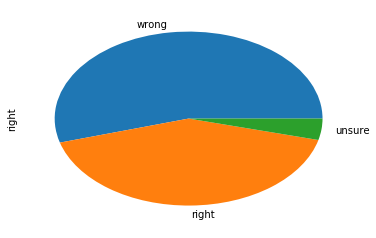

In [17]:
give_result_global_info(topic_tfidf)